In [32]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")

from c_utree_boost import Agent_boost_Galen_action_numpy as Agent
from c_utree_boost import Problem
from split_data import split_data

In [33]:
estimator = "DR"
competition = "L"
agent_num = 3
special = "9_contexts"
num_contexts = 9

# Normal Data

In [34]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_9contexts.json')

In [35]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/3 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  40%|███▉      | 6537/16384 [00:02<00:03, 3209.17it/s]


Stopping at Epoch 6537



DR 1: 100%|██████████| 32768/32768 [00:07<00:00, 4122.47it/s]


AUC predicting P(win):				 0.6237246515956472
Estimated Utility	 Mean Error:			 0.3435426665235368
Estimated Utility	 Mean Absolute Error:	 0.3532062959448917



Initialising Policy:  63%|██████▎   | 10319/16384 [00:08<00:04, 1223.21it/s]


Stopping at Epoch 10319
Predicted mu Gammas:  tensor(0.9769, grad_fn=<MinBackward1>) tensor(1.0067, grad_fn=<MaxBackward1>) tensor(1.0002, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0462, grad_fn=<MinBackward1>) tensor(0.0730, grad_fn=<MaxBackward1>) tensor(0.0505, grad_fn=<MeanBackward0>)



DR 1:  13%|█▎        | 4172/32768 [00:05<00:35, 795.40it/s]


Stopping at Epoch 4172
DR 1 Number of samples:  torch.Size([6641, 2])
DR 1 Predicted Gammas:  0.70613396 0.86742955 0.7666635
agent: 1




DR 2:  41%|████      | 6674/16384 [00:02<00:02, 3263.96it/s]


Stopping at Epoch 6674



DR 2: 100%|██████████| 32768/32768 [00:07<00:00, 4102.92it/s]


AUC predicting P(win):				 0.7856714870429126
Estimated Utility	 Mean Error:			 0.357815695216754
Estimated Utility	 Mean Absolute Error:	 0.37009370578187917



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1214.01it/s]


Predicted mu Gammas:  tensor(0.9938, grad_fn=<MinBackward1>) tensor(1.0020, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0357, grad_fn=<MinBackward1>) tensor(0.1143, grad_fn=<MaxBackward1>) tensor(0.0496, grad_fn=<MeanBackward0>)



DR 2:  13%|█▎        | 4227/32768 [00:05<00:38, 750.98it/s]


Stopping at Epoch 4227
DR 2 Number of samples:  torch.Size([6685, 2])
DR 2 Predicted Gammas:  0.6817522 0.8846096 0.74226695
agent: 2




DR 3:  37%|███▋      | 5994/16384 [00:13<00:23, 443.21it/s]


Stopping at Epoch 5994



DR 3: 100%|██████████| 32768/32768 [00:08<00:00, 4041.25it/s]


AUC predicting P(win):				 0.9509242039766408
Estimated Utility	 Mean Error:			 0.8691259023641297
Estimated Utility	 Mean Absolute Error:	 0.9001599181646874



Initialising Policy: 100%|██████████| 16384/16384 [00:13<00:00, 1174.01it/s]


Predicted mu Gammas:  tensor(0.9108, grad_fn=<MinBackward1>) tensor(1.0169, grad_fn=<MaxBackward1>) tensor(0.9991, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0491, grad_fn=<MinBackward1>) tensor(0.0758, grad_fn=<MaxBackward1>) tensor(0.0528, grad_fn=<MeanBackward0>)



DR 3:  67%|██████▋   | 22000/32768 [00:30<00:14, 727.65it/s]


Stopping at Epoch 22000
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.6320072 1.0 0.7240683
number of iteration: 1

agent: 0




DR 1:  18%|█▊        | 3010/16384 [00:00<00:03, 3527.33it/s]


Stopping at Epoch 3010
AUC predicting P(win):				 0.7382524018819009
Estimated Utility	 Mean Error:			 0.007503673151196158
Estimated Utility	 Mean Absolute Error:	 0.12367524825610998



DR 1:  65%|██████▌   | 21326/32768 [00:05<00:02, 4080.24it/s]

Epoch 20584: reducing learning rate of group 0 to 6.0000e-04.
Epoch 20854: reducing learning rate of group 0 to 1.2000e-04.
Epoch 21111: reducing learning rate of group 0 to 2.4000e-05.
Epoch 21368: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  67%|██████▋   | 21981/32768 [00:05<00:02, 3995.41it/s]


Epoch 21625: reducing learning rate of group 0 to 9.6000e-07.
Epoch 21882: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 21981
AUC predicting P(win):				 0.7978791058466848
Estimated Utility	 Mean Error:			 0.03782720530508693
Estimated Utility	 Mean Absolute Error:	 0.12456169634360516



DR 1:   8%|▊         | 2514/32768 [00:03<00:40, 755.22it/s]


Stopping at Epoch 2514
DR 1 Number of samples:  torch.Size([6643, 2])
DR 1 Predicted Gammas:  0.5995559 0.78970903 0.70089865
agent: 1




DR 2:  12%|█▏        | 1918/16384 [00:00<00:04, 3284.15it/s]


Stopping at Epoch 1918
AUC predicting P(win):				 0.7928697272594272
Estimated Utility	 Mean Error:			 -0.01730538875979145
Estimated Utility	 Mean Absolute Error:	 0.16859227649275318



DR 2:  30%|██▉       | 9750/32768 [00:02<00:05, 4046.86it/s]

Epoch 09281: reducing learning rate of group 0 to 6.0000e-04.
Epoch 09563: reducing learning rate of group 0 to 1.2000e-04.
Epoch 09820: reducing learning rate of group 0 to 2.4000e-05.
Epoch 10077: reducing learning rate of group 0 to 4.8000e-06.



DR 2:  33%|███▎      | 10732/32768 [00:02<00:05, 4031.19it/s]


Epoch 10334: reducing learning rate of group 0 to 9.6000e-07.
Epoch 10591: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 10732
AUC predicting P(win):				 0.7930812237411672
Estimated Utility	 Mean Error:			 0.03283626393091554
Estimated Utility	 Mean Absolute Error:	 0.17605369355465006



DR 2:   3%|▎         | 1054/32768 [00:01<00:44, 718.64it/s]


Stopping at Epoch 1054
DR 2 Number of samples:  torch.Size([6574, 2])
DR 2 Predicted Gammas:  0.63818514 0.7667726 0.7053653
agent: 2




DR 3:  44%|████▍     | 7219/16384 [00:20<00:25, 360.00it/s]


Stopping at Epoch 7219
AUC predicting P(win):				 0.6593109553339451
Estimated Utility	 Mean Error:			 0.21543452647182415
Estimated Utility	 Mean Absolute Error:	 0.55847463406139



DR 3:  47%|████▋     | 15494/32768 [00:03<00:04, 4061.55it/s]

Epoch 14918: reducing learning rate of group 0 to 6.0000e-04.
Epoch 15195: reducing learning rate of group 0 to 1.2000e-04.
Epoch 15452: reducing learning rate of group 0 to 2.4000e-05.
Epoch 15709: reducing learning rate of group 0 to 4.8000e-06.



DR 3:  50%|█████     | 16429/32768 [00:04<00:04, 4057.36it/s]


Epoch 15966: reducing learning rate of group 0 to 9.6000e-07.
Epoch 16223: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 16429
AUC predicting P(win):				 0.7531466915709061
Estimated Utility	 Mean Error:			 0.34689030882225885
Estimated Utility	 Mean Absolute Error:	 0.5571923142425385



DR 3:  18%|█▊        | 6003/32768 [00:07<00:34, 767.68it/s]


Stopping at Epoch 6003
DR 3 Number of samples:  torch.Size([6783, 2])
DR 3 Predicted Gammas:  0.48592415 1.0 0.6383894
number of iteration: 2

agent: 0




DR 1:  12%|█▏        | 2024/16384 [00:00<00:04, 3061.05it/s]


Stopping at Epoch 2024
AUC predicting P(win):				 0.7734337497539887
Estimated Utility	 Mean Error:			 0.0094430117715433
Estimated Utility	 Mean Absolute Error:	 0.19819838695635425



DR 1:  40%|███▉      | 12973/32768 [00:03<00:04, 3988.81it/s]


Epoch 12565: reducing learning rate of group 0 to 6.0000e-04.
Epoch 12826: reducing learning rate of group 0 to 1.2000e-04.
Epoch 13083: reducing learning rate of group 0 to 2.4000e-05.
Epoch 13340: reducing learning rate of group 0 to 4.8000e-06.


DR 1:  43%|████▎     | 13994/32768 [00:03<00:04, 3904.85it/s]


Epoch 13597: reducing learning rate of group 0 to 9.6000e-07.
Epoch 13854: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 13994
AUC predicting P(win):				 0.7765408211393534
Estimated Utility	 Mean Error:			 0.04624942104607795
Estimated Utility	 Mean Absolute Error:	 0.20409625925171446



DR 1:   3%|▎         | 1053/32768 [00:01<00:40, 779.59it/s]


Stopping at Epoch 1053
DR 1 Number of samples:  torch.Size([6651, 2])
DR 1 Predicted Gammas:  0.5657424 0.7191147 0.6428025
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:00<00:05, 2887.83it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.828102168839392
Estimated Utility	 Mean Error:			 -0.01065389191036695
Estimated Utility	 Mean Absolute Error:	 0.23423332583348022



DR 2:  36%|███▋      | 11901/32768 [00:03<00:05, 3938.38it/s]

Epoch 11188: reducing learning rate of group 0 to 6.0000e-04.
Epoch 11511: reducing learning rate of group 0 to 1.2000e-04.
Epoch 11768: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  39%|███▉      | 12702/32768 [00:03<00:05, 3938.23it/s]


Epoch 12025: reducing learning rate of group 0 to 4.8000e-06.
Epoch 12282: reducing learning rate of group 0 to 9.6000e-07.
Epoch 12539: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 12702
AUC predicting P(win):				 0.8313493630721869
Estimated Utility	 Mean Error:			 0.019327575391487186
Estimated Utility	 Mean Absolute Error:	 0.23337370387246267



DR 2:  10%|█         | 3412/32768 [00:04<00:39, 739.44it/s]


Stopping at Epoch 3412
DR 2 Number of samples:  torch.Size([6719, 2])
DR 2 Predicted Gammas:  0.5696474 0.7111216 0.6435288
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:20, 737.90it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8144378833308186
Estimated Utility	 Mean Error:			 -0.01741018397555009
Estimated Utility	 Mean Absolute Error:	 0.37701950608826507



DR 3:  38%|███▊      | 12565/32768 [00:03<00:04, 4047.57it/s]

Epoch 11987: reducing learning rate of group 0 to 6.0000e-04.
Epoch 12290: reducing learning rate of group 0 to 1.2000e-04.
Epoch 12547: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  41%|████      | 13372/32768 [00:03<00:04, 4001.18it/s]

Epoch 12804: reducing learning rate of group 0 to 4.8000e-06.
Epoch 13061: reducing learning rate of group 0 to 9.6000e-07.
Epoch 13318: reducing learning rate of group 0 to 1.9200e-07.
Epoch 13575: reducing learning rate of group 0 to 1.0000e-07.



DR 3:  42%|████▏     | 13824/32768 [00:03<00:04, 4022.66it/s]


Stopping at Epoch 13824
AUC predicting P(win):				 0.8189159081551044
Estimated Utility	 Mean Error:			 0.017199511681863754
Estimated Utility	 Mean Absolute Error:	 0.36126597305477487



DR 3:   2%|▏         | 627/32768 [00:00<00:43, 735.30it/s]


Stopping at Epoch 627
DR 3 Number of samples:  torch.Size([6630, 2])
DR 3 Predicted Gammas:  0.4895736 1.0 0.69197655


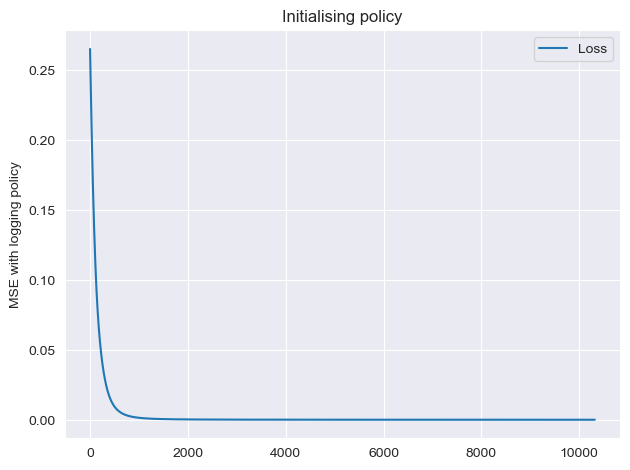

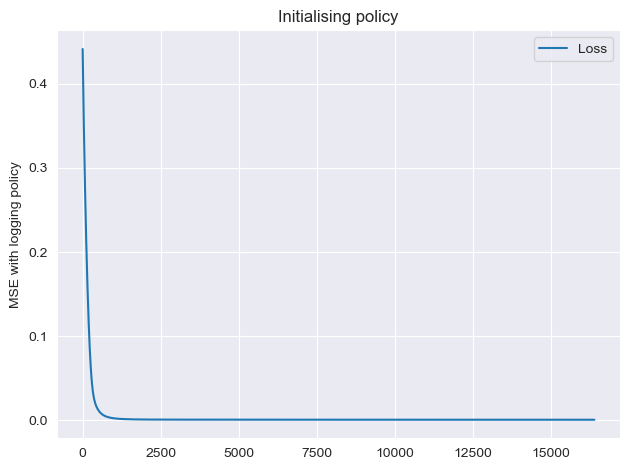

In [36]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [38]:
pickle.dump(auction, open(f'DR_L_auction_{special}.pickle', 'wb'))

In [12]:
auction = pickle.load(open(f'DR_L_auction_{special}.pickle', 'rb'))

# data generation

In [39]:
# data generation
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}


num_data = [80000, 10000, 10000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

# Save Data

In [50]:
data_dir = f"../data_{estimator}_{competition}_{special}/"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [51]:
# split_data
for data_set in offline_data.keys():
    for agent_id in offline_data[data_set].keys():
        split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', special=f'_{special}')

# Read data

In [41]:
offline_data_key = {'context': 0, 'estimated_CTR': num_contexts, 'value': num_contexts+1, 'bid': num_contexts+2, 'gamma': num_contexts+3, 'true_CTR': num_contexts+4, 'price': num_contexts+5, 'second_price': num_contexts+6, 'won_mask': num_contexts+7, 'outcome': num_contexts+8, 'utility': 14}

In [20]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [5]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/test_{agent_id}.csv")

# CUTree

In [50]:
problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=2, split_size=1000,games_directory="../data_DR_H_split_1000/train/")

# disable the max_hist
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=3000, training_mode='')

max_hist 3000


In [48]:
#for agent_id in offline_data['train'].keys():
min_split_int = 50
for agent_id in range(3):
    for max_depth in [20]:
            problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000,games_directory="../data_DR_L_split_1000/train/")

            CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, training_mode='')
            print("Agent", agent_id)
            print("Max Depth", max_depth)
            input_train_data = offline_data['train'][agent_id][:, :5]
            label_train_data = offline_data['train'][agent_id][:, 7]

            input_test_data = offline_data['test'][agent_id][:, :5]
            label_test_data = offline_data['test'][agent_id][:, 7]

            train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=53, data_set='train')
            test_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=53, data_set='test')
            print("Train R2 score:", r2_score(label_train_data, train_preds))
            print("Test R2 score:", r2_score(label_test_data, test_preds))
            print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
            print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 1
Max Depth 20
<ipykernel.iostream.OutStream object at 0x103963b50> starting from 53
<ipykernel.iostream.OutStream object at 0x103963b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x103963b50> starting from 53
<ipykernel.iostream.OutStream object at 0x103963b50> finishing read tree
Train R2 score: 0.4672539167145573
Test R2 score: 0.34063893775642085
Train MSE:  0.03379633163649164
Test MSE:  0.041284912327810425


# M5 Tree

In [52]:
from m5py import M5Prime, export_text_m5

In [33]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [53]:
param_grid = {
    'max_depth': [ 20]
    #'min_samples_split': [2, 4, 10, 20, 36, 50]
}

In [54]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_)
    return best_model

In [57]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}
# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :num_contexts].astype('float64')
    label_train_data = offline_data['train'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_val_data = offline_data['val'][agent_id][:, :num_contexts].astype('float64')
    label_val_data = offline_data['val'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_test_data = offline_data['test'][agent_id][:, :num_contexts].astype('float64')
    label_test_data = offline_data['test'][agent_id][:, offline_data_key['bid']].astype('float64')

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.7373289346286376
Test R2 score: 0.7635735252190143
Train MSE:  0.005795586796264954
Test MSE:  0.009351525882938503
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.8064292485404798
Test R2 score: 0.8026605214261933
Train MSE:  0.005336973031832068
Test MSE:  0.008900377155535566
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.7809448308970715
Test R2 score: 0.777029934523901
Train MSE:  0.004842925149242697
Test MSE:  0.008028027006146911


In [58]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :num_contexts].astype('float64')
    label_train_data = offline_data['train'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_val_data = offline_data['val'][agent_id][:, :num_contexts].astype('float64')
    label_val_data = offline_data['val'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_test_data = offline_data['test'][agent_id][:, :num_contexts].astype('float64')
    label_test_data = offline_data['test'][agent_id][:, offline_data_key['bid']].astype('float64')

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.5617374178049535
Test R2 score: 0.597705992404267
Train MSE:  0.0016667923899202433
Test MSE:  0.01591218930987976
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.6859410111462237
Test R2 score: 0.6759090114420192
Train MSE:  0.0018218485206640824
Test MSE:  0.014617105769829783
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.6623247250058385
Test R2 score: 0.6721668488320346
Train MSE:  0.002193804718630743
Test MSE:  0.011803617608789676


In [14]:
param_grid

{'max_depth': [5, 10, 25, 50], 'min_samples_split': [2, 4, 10, 20, 50, 100]}

In [25]:
offline_data['train'][2][:, 7].std()

0.06731641454531978

In [24]:
offline_data['train'][0][:, 7].std()

0.15162827522929714

In [41]:
# If the rng record is cleared, use this
rng = np.random.default_rng(0)

In [42]:
# This is for single agent get replaced by surrogate model
for agent_id in offline_data['train'].keys():
    surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
    data_set = 'test'
    surrogate_agent_id = agent_id
    surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :5])
    context_num = 5
    for i in range(len(offline_data[data_set][surrogate_agent_id])):
        # win_mask
        if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                surrogate_logs['won_mask'].append(True)
                surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
        else:
            if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                surrogate_logs['won_mask'].append(True)
                # This creates randomness in the surrogate model
                outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                surrogate_logs['outcomes'].append(outcome)
                surrogate_logs['prices'].append(surrogate_bid[i])
            else:
                surrogate_logs['won_mask'].append(False)
                surrogate_logs['outcomes'].append(0)
                surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

    surrogate_won_mask = np.array(surrogate_logs['won_mask'])
    surrogate_outcomes = np.array(surrogate_logs['outcomes'])
    surrogate_prices = np.array(surrogate_logs['prices'])
    surrogate_utilities = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
    surrogate_utilities[surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
    print(f"Agent: {agent_id}")
    print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
    print(f"Surrogate utility: {surrogate_utilities.mean()}" )
    print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities)}")

Agent: 0
Original utility: 0.004906677055637212
Surrogate utility: 0.005488817879097059
R2 score: 0.8630118454135507
Agent: 1
Original utility: 0.047288165889720034
Surrogate utility: 0.0436259102955381
R2 score: 0.8579546731914592
Agent: 2
Original utility: 0.03137086689375815
Surrogate utility: 0.03045715435526283
R2 score: 0.9170638279535878


<AxesSubplot:>

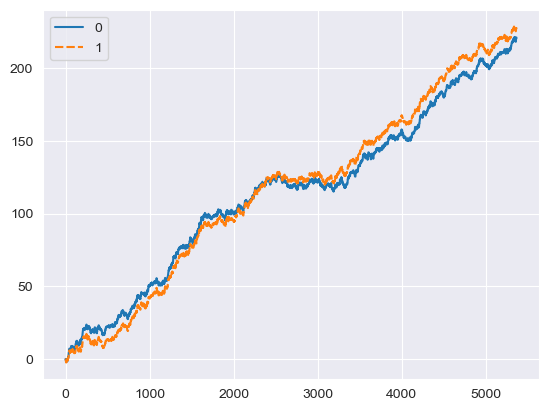

In [245]:
sns.lineplot(data=[surrogate_utilities.cumsum(), offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].cumsum()])

In [316]:
# TODO: add label to features

In [304]:
explainer = shap.TreeExplainer(context_bid_estimators[0])

In [319]:
shap_values = explainer.shap_values(offline_data['test'][0][:, :5])
# naturally, the constant/ bias term in context doesnt have any effect on the prediction

In [320]:
offline_data['test'][0][:, :5].shape

(5320, 5)

In [321]:
shap_values.shape

(5320, 5)

In [317]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:200,:], offline_data['test'][0][:200, :5])

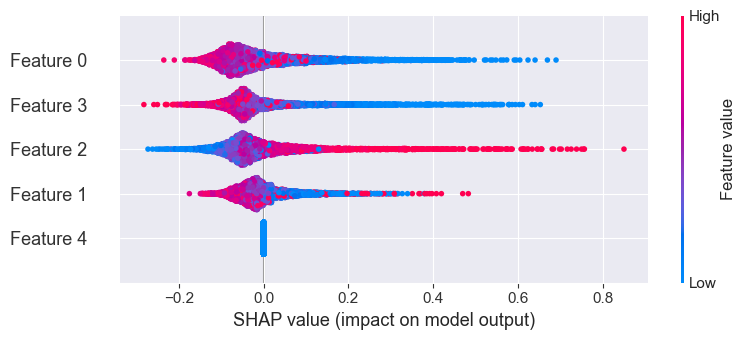

In [322]:
shap.summary_plot(shap_values, offline_data['test'][0][:, :5])

In [207]:
# # This is for single agent get replaced by surrogate model
#
# surrogate_model = None
# data_set = 'test'
# surrogate_agent_id = 0
# surrogate_bid = test_preds
# j = 0
# for i in range(len(participating_agents_logs[data_set])):
#     bids = []
#     CTRs = []
#     if surrogate_agent_id in participating_agents_logs[data_set][i]:
#         for agent_id in offline_data[data_set].keys():
#             if agent_id == surrogate_agent_id:
#                 bids.append(test_preds[j])
#                 j+=1
#             else:
#                 bids.append(offline_data[data_set][agent_id][j, 7])
#             CTRs.append(offline_data[data_set][agent_id][j, 9])
#         bids = np.array(bids)
#         CTRs = np.array(CTRs)
#         winners = np.argsort(-bids)[:1]
#         outcomes = rng.binomial(1, CTRs[winners])
#         # currently only consider one winner
#         if surrogate_agent_id == winners:
#             surrogate_logs['outcomes'].append(outcomes)
#             surrogate_logs['won_mask'].append(1)
#         else:
#             surrogate_logs['outcomes'].append(0)
#             surrogate_logs['won_mask'].append(0)
#         surrogate_logs['prices'].append(bids[winners])
#     else:
#         pass

In [83]:
# context with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, :5]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, :5]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.7276250965125122
Test R2 score: 0.7416675628006455
Train MSE:  0.00022022459909153483
Test MSE:  0.00027168110604471903
Agent 1
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.4048234159067919
Test R2 score: 0.39205196499514683
Train MSE:  0.00013023620239745016
Test MSE:  0.0001698578591254831
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [210]:
# estimated_CTR and value with bid
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 7]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 7]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
CV score for GS 0.9994057387395154
Test R2 score: 0.9993624406666591
Train MSE:  2.1039844916142337e-05
Test MSE:  3.602544011977278e-05
Agent 1
Param for GS {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 0.9999547836211953
Test R2 score: 0.9999626617457903
Train MSE:  4.217735241951066e-07
Test MSE:  2.1888072122472528e-06
Agent 2
Param for GS {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
CV score for GS 0.9993136801654782
Test R2 score: 0.9993091525895826
Train MSE:  2.3764045696378117e-05
Test MSE:  2.8988811842495896e-05


In [85]:
# estimated_CTR and value with gamma
for agent_id in offline_data['train'].keys():
    input_train_data = offline_data['train'][agent_id][:, 5:7]
    label_train_data = offline_data['train'][agent_id][:, 8]
    print("Agent", agent_id)
    best_estimator = gridSearch(model, param_grid, input_train_data, label_train_data)
    input_test_data = offline_data['test'][agent_id][:, 5:7]
    label_test_data = offline_data['test'][agent_id][:, 8]
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds =best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Param for GS {'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 2}
CV score for GS 0.9069516511333034
Test R2 score: 0.9079438564449289
Train MSE:  9.46583991692418e-05
Test MSE:  9.681290963841697e-05
Agent 1
Param for GS {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
CV score for GS 0.6273128939537818
Test R2 score: 0.6142501426573515
Train MSE:  9.935543498714107e-05
Test MSE:  0.00010777671964292107
Agent 2
Param for GS {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score for GS 1.0
Test R2 score: 1.0
Train MSE:  0.0
Test MSE:  0.0


In [237]:
x = context_bid_estimators[0]

In [223]:
x([2, 3])

TypeError: 'DecisionTreeRegressor' object is not callable

In [240]:
float(x.predict(np.array([1, 2, 3, 2, 3]).reshape(-1, 5)))

0.7775402386708143

In [241]:
len(np.array([1, 2, 3, 2, 3]))

5

In [243]:
np.argmax(np.array([1, 2, 3, 2, 3]))

2